# WELCOME!

Welcome to ***"Demand Prediction Project"***. This is the third capstone project.
As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

In this project, the goal is to predict the number of future bike shares given the historical data of London bike shares. So this case should be handled as a time series problem with ***Bidirectional LSTM***. 

In order to achieve this goal, you will make predictions with LSTM, unlike the machine learning algorithms you have applied before. Long short term memory (LSTM) is an artificial repetitive neural network architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback links. It can process not only single data points but also entire data series. 

Before diving into the project, please take a look at the Determines and Tasks.

- **NOTE:** This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind LSTM.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.

Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.

In the Pre-Processing task after train test split and robust scaling, the challenge for you will be to divide the data into time steps and transform it into a three dimentional numpy array.

Then in the model building task, build your model appropriate and compare the train and validation losses using a graph. 

When making prediction, you will need to do the inverse transform process to get a true error score. Otherwise, the results you get with scaled target variables may mislead you.

Finally, Visualize how well your model's predictions match the actual values of the test data and also calculate error scores.


- ***Note:*** *What you can do in this project is more than what is asked of you.*


# #Tasks

#### 1. Exploratory Data Analysis

- Check Missing Values and Outliers
- Plot Breakdowns of Data

    *i.  Plot bike shares over time*
    
    *ii.  Plot bike shares by months*
    
    *iii. Plot bike shares by hours*
    
    *iv. Plot bike shares by day of week*
    
    *v. Plot the distribution of bike shares on holidays by seasons*

    
#### 2. Data Pre-Processing

- Train - Test Split
- Scaling
- Define a Function for Creating Time Steps

#### 3. Model Building with LSTM

- Create, Compile and Fit Bidirectional LSTM Model
- Plot Train and Validation Losses

#### 4. Demand Prediction

- Inverse Transform
- Plot Prediction
- Calculate Train and Test Error Scores



In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 22,10
pd.options.display.float_format = '{:20,.2f}'.format


In [75]:
df = pd.read_csv("store_sharing.csv", parse_dates=['timestamp'], index_col='timestamp')
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


---
---

## 1. Exploratory Data Analysis

- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.
- You can check missing values and outliers.
- Also you can plot breakdowns of data.

### Check Missing Values and Outliers

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


In [77]:
df.isnull().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [78]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season'],
      dtype='object')

In [80]:
#df["timestamp"] = pd.to_datetime(df["timestamp"])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


In [83]:
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# df['year'] = df['timestamp'].dt.year
# df['month'] = df['timestamp'].dt.month
# df['day'] = df['timestamp'].dt.day
# df['hour'] = df['timestamp'].dt.hour

df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4


In [84]:
df.groupby("year").max()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour
year,,,,,,,,,,,,
2015,7860,34.0,34.0,100.0,56.5,26.0,1.0,1.0,3.0,12,31,23
2016,5422,33.0,32.5,100.0,56.0,26.0,1.0,1.0,3.0,12,31,23
2017,2904,10.0,8.0,93.0,27.0,26.0,1.0,1.0,3.0,1,3,23


In [85]:
df.groupby("year").nunique()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour
year,,,,,,,,,,,,
2015,2967,69,78,140,95,7,2,2,4,12,31,24
2016,3040,70,77,132,93,7,2,2,4,12,31,24
2017,71,18,22,16,22,6,2,2,1,1,3,24


### Plot Breakdowns of Data

In [88]:
pd.options.display.float_format = '{:20,.2f}'.format
df.var()
# high var on cnt, hum better to scale those

cnt                    1,177,459.52
t1                            31.05
t2                            43.76
hum                          204.87
wind_speed                    62.32
weather_code                   5.48
is_holiday                     0.02
is_weekend                     0.20
season                         1.25
year                           0.26
month                         11.92
day                           77.33
hour                          47.83
dtype: float64

<AxesSubplot:>

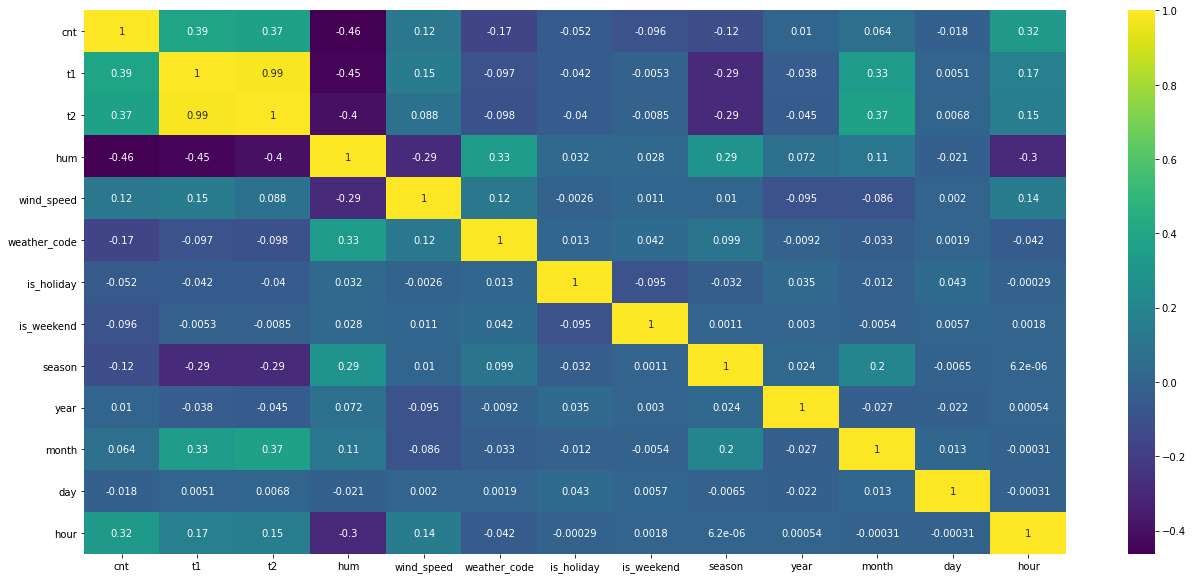

In [86]:
#plt.figure(figsize=(15,9))
sns.heatmap(df.corr(), cmap="viridis", annot=True)

***i. Plot bike shares over time***

In [89]:
df['year'].value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

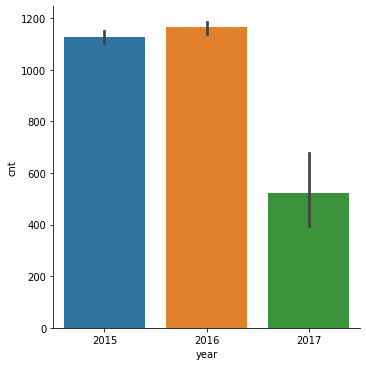

In [90]:
sns.catplot(x='year',y="cnt",data=df,kind='bar')

<AxesSubplot:xlabel='season'>

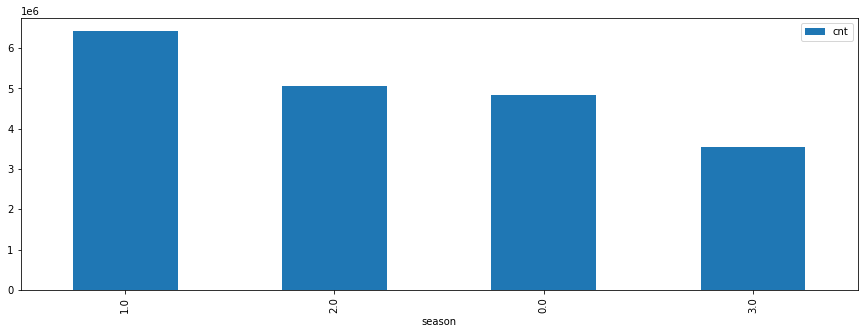

In [91]:
# 0-spring ; 1-summer; 2-fall; 3-winter.

df.groupby(['season']).sum()[['cnt']].sort_values('cnt',ascending=False).plot(kind='bar',figsize=(15,5))

***ii. Plot bike shares by months***

<AxesSubplot:xlabel='season'>

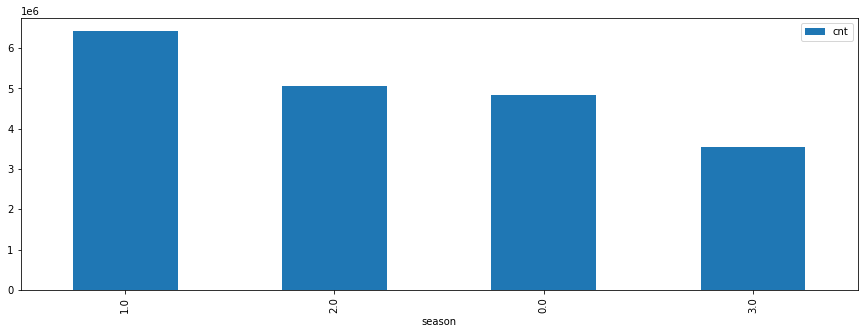

In [92]:
df.groupby(['season']).sum()[['cnt']].sort_values('cnt',ascending=False).plot(kind='bar',figsize=(15,5))

***iii. Plot bike shares by hours***
- *whether it is a holiday or not*
- *You may want to see seasonal breakdowns*

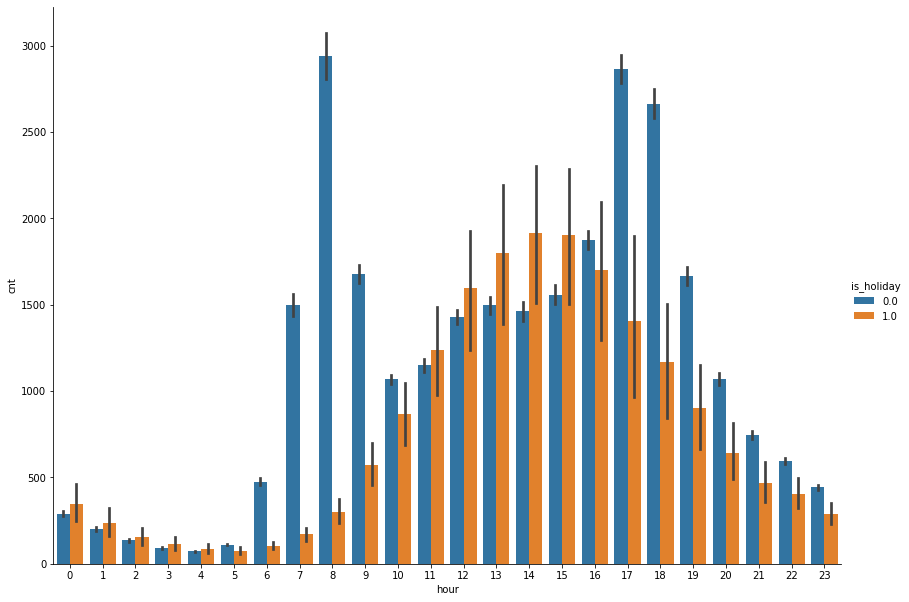

In [93]:

sns.catplot(x='hour',y="cnt",data=df,kind='bar', hue="is_holiday", height=8.27, aspect=11.7/8.27)

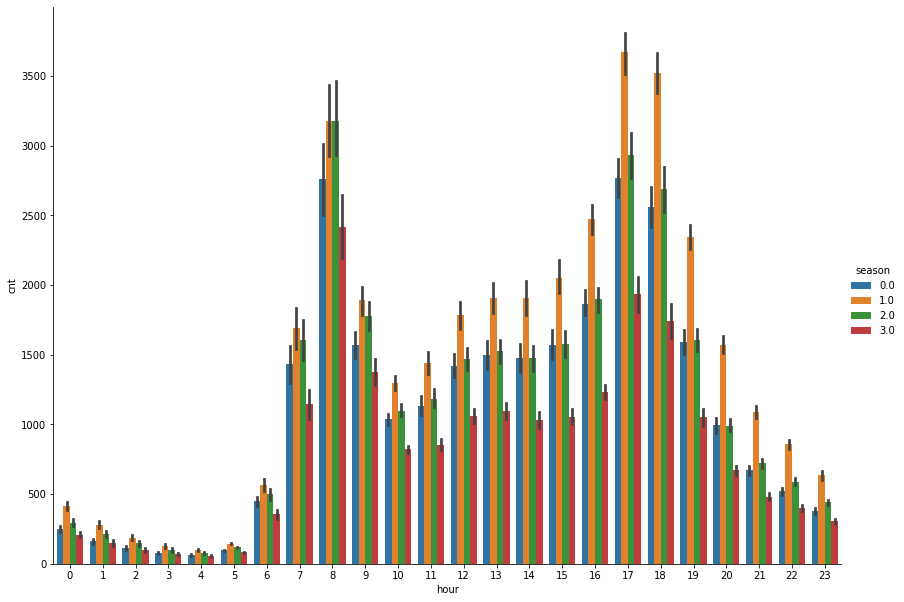

In [94]:
# 0-spring ; 1-summer; 2-fall; 3-winter.

sns.catplot(x='hour',y="cnt",data=df,kind='bar', hue="season", height=8.27, aspect=11.7/8.27)

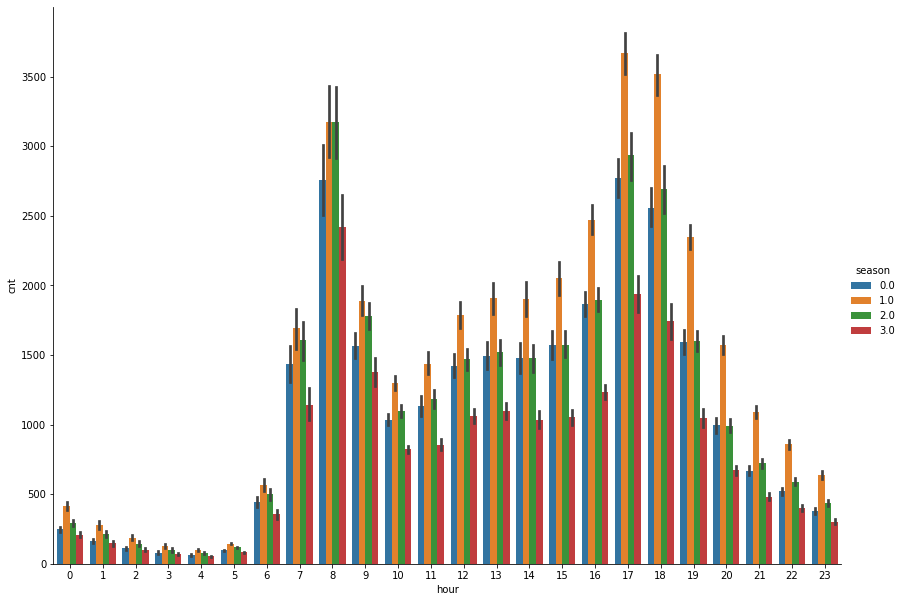

In [95]:
sns.catplot(x='hour',y="cnt",data=df,kind='bar', hue="season", height=8.27, aspect=11.7/8.27)

***iv. Plot bike shares by day of week***
- *You may want to see seasonal breakdowns*

In [98]:
df['day_of_week'] = df.index.day_name()
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,day_of_week
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.00,2.00,93.00,6.00,3.00,0.00,1.00,3.00,2015,1,4,0,Sunday
2015-01-04 01:00:00,138,3.00,2.50,93.00,5.00,1.00,0.00,1.00,3.00,2015,1,4,1,Sunday
2015-01-04 02:00:00,134,2.50,2.50,96.50,0.00,1.00,0.00,1.00,3.00,2015,1,4,2,Sunday
2015-01-04 03:00:00,72,2.00,2.00,100.00,0.00,1.00,0.00,1.00,3.00,2015,1,4,3,Sunday
2015-01-04 04:00:00,47,2.00,0.00,93.00,6.50,1.00,0.00,1.00,3.00,2015,1,4,4,Sunday


<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

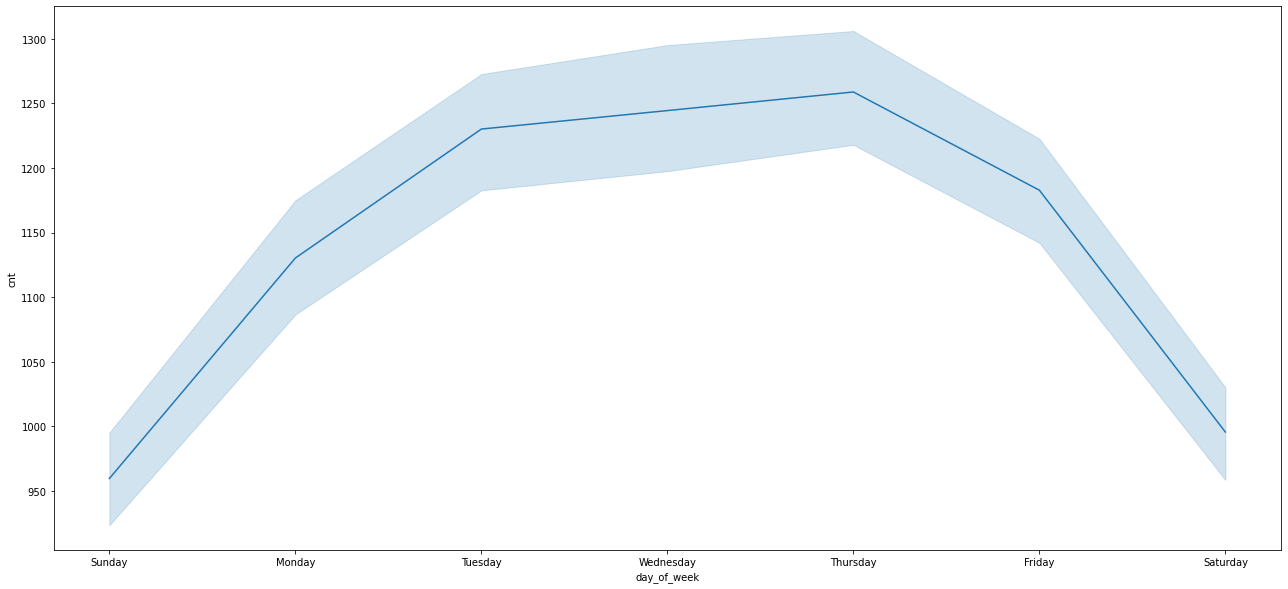

In [99]:
sns.lineplot(x= 'day_of_week', y= 'cnt', data =df)

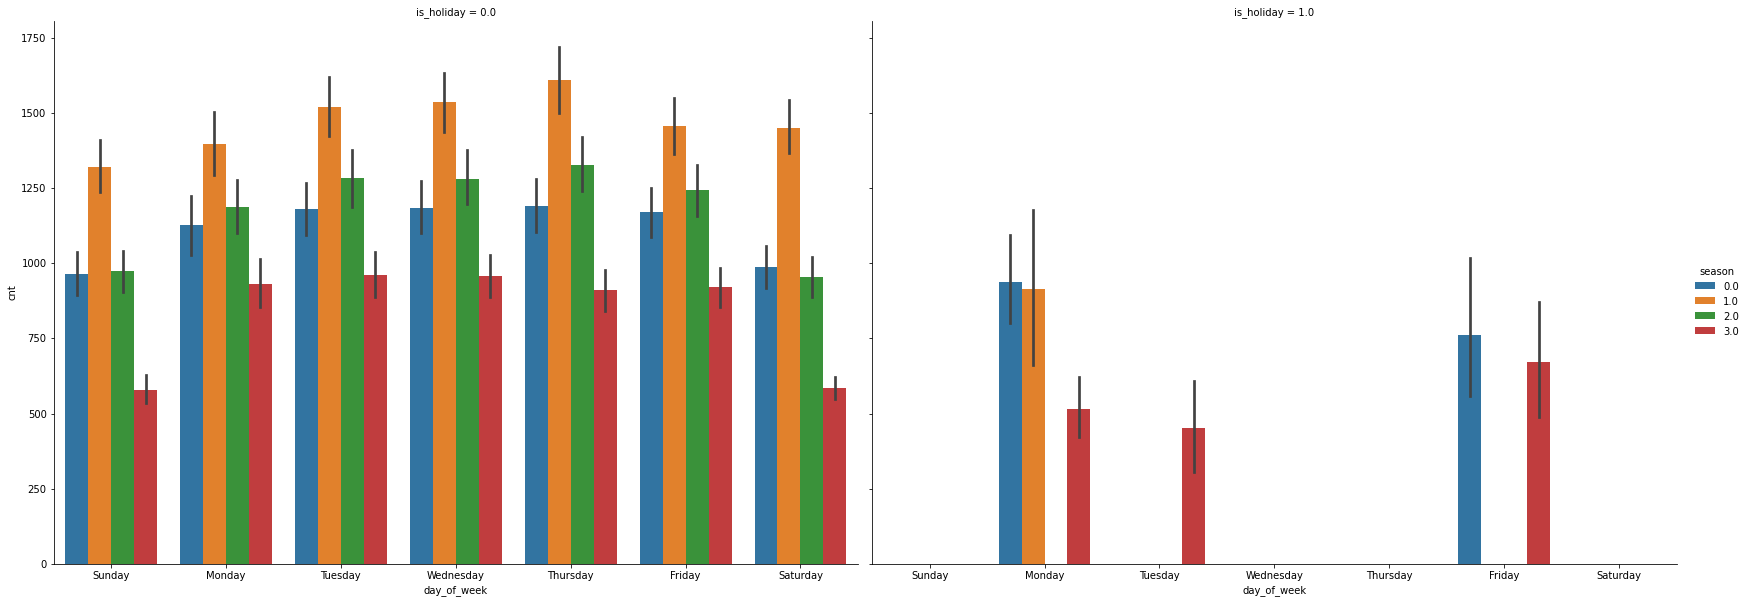

In [100]:
sns.catplot(x='day_of_week',y="cnt",
            data=df,kind='bar', hue="season",
            col="is_holiday", height=8.27, aspect=11.7/8.27)

***v. Plot the distribution of bike shares on holidays by seasons***

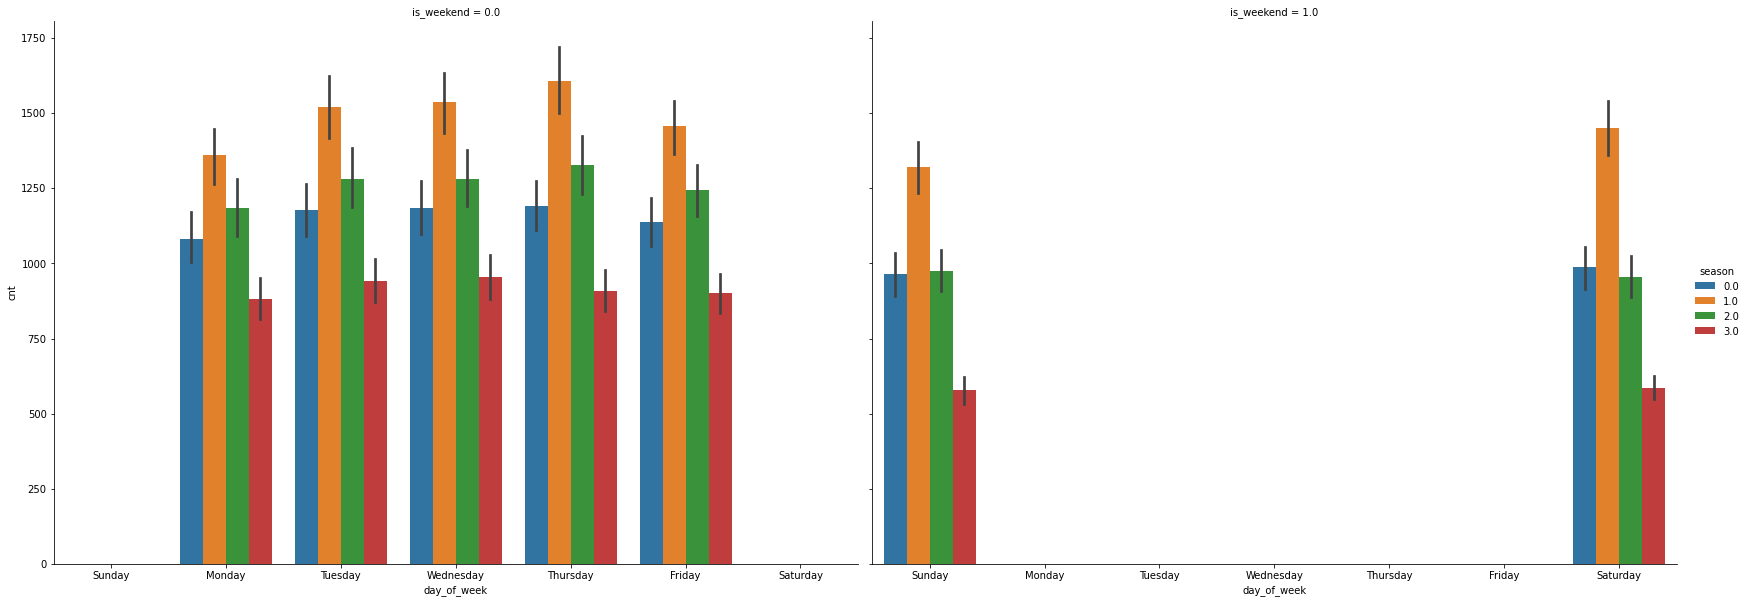

In [101]:
sns.catplot(x='day_of_week',y="cnt",data=df,kind='bar', hue="season",col="is_weekend", height=8.27, aspect=11.7/8.27)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   year          17414 non-null  int64  
 10  month         17414 non-null  int64  
 11  day           17414 non-null  int64  
 12  hour          17414 non-null  int64  
 13  day_of_week   17414 non-null  object 
dtypes: float64(8), int64(5), object(1)
memory usage: 2.0+ MB


<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

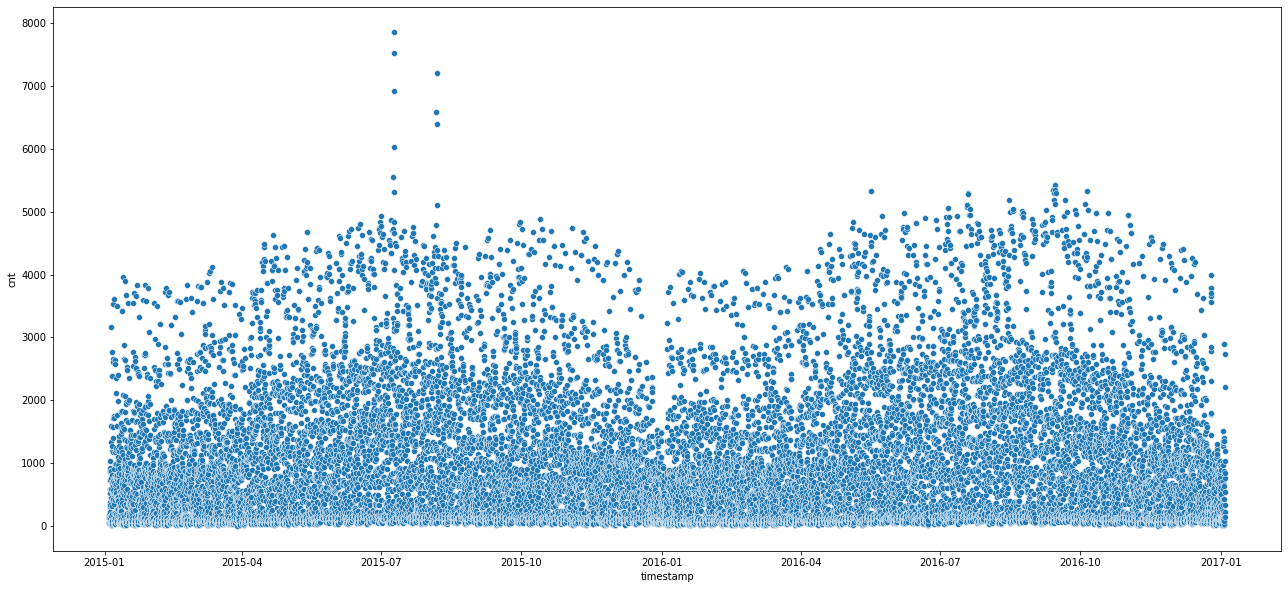

In [105]:
sns.scatterplot(x=df.index, y='cnt', data=df)

In [ ]:
sns.scatterplot(x=df.index, y='cnt', data=df)

In [106]:
#sns.lineplot(x=df.index, y='cnt', ls= " ", marker=".", markersize=10, data=df)

---
---

## 2. Data Pre-Processing


### Train - Test Split

Appropriately split the data for optimum training.

In [110]:
df2 = df.copy()

In [107]:
df["weather_code"].value_counts()

 1.00    6150
 2.00    4034
 3.00    3551
 7.00    2141
 4.00    1464
26.00      60
10.00      14
Name: weather_code, dtype: int64

In [25]:
#t1 and t2 are very close to each other, so we dropped one of them 
df_model = df.drop("t2", axis=1)
df_model = df_model.drop(["timestamp","weather_code", "season","day"], axis=1)
df_model

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,year,month,hour,day_of_week
0,182,3.0,93.0,6.0,0.0,1.0,2015,1,0,Sunday
1,138,3.0,93.0,5.0,0.0,1.0,2015,1,1,Sunday
2,134,2.5,96.5,0.0,0.0,1.0,2015,1,2,Sunday
3,72,2.0,100.0,0.0,0.0,1.0,2015,1,3,Sunday
4,47,2.0,93.0,6.5,0.0,1.0,2015,1,4,Sunday
...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,81.0,19.0,0.0,0.0,2017,1,19,Tuesday
17410,541,5.0,81.0,21.0,0.0,0.0,2017,1,20,Tuesday
17411,337,5.5,78.5,24.0,0.0,0.0,2017,1,21,Tuesday
17412,224,5.5,76.0,23.0,0.0,0.0,2017,1,22,Tuesday


In [26]:
df_model_dummy = pd.get_dummies(df_model)
df_model_dummy

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,year,month,hour,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,182,3.0,93.0,6.0,0.0,1.0,2015,1,0,0,0,0,1,0,0,0
1,138,3.0,93.0,5.0,0.0,1.0,2015,1,1,0,0,0,1,0,0,0
2,134,2.5,96.5,0.0,0.0,1.0,2015,1,2,0,0,0,1,0,0,0
3,72,2.0,100.0,0.0,0.0,1.0,2015,1,3,0,0,0,1,0,0,0
4,47,2.0,93.0,6.5,0.0,1.0,2015,1,4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,81.0,19.0,0.0,0.0,2017,1,19,0,0,0,0,0,1,0
17410,541,5.0,81.0,21.0,0.0,0.0,2017,1,20,0,0,0,0,0,1,0
17411,337,5.5,78.5,24.0,0.0,0.0,2017,1,21,0,0,0,0,0,1,0
17412,224,5.5,76.0,23.0,0.0,0.0,2017,1,22,0,0,0,0,0,1,0


In [27]:
X = df_model_dummy.drop("cnt", axis=1)
y = df_model_dummy["cnt"]
y

0         182
1         138
2         134
3          72
4          47
         ... 
17409    1042
17410     541
17411     337
17412     224
17413     139
Name: cnt, Length: 17414, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

### Scaling

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.

- ***Note:*** *You are expected to scale only 't1', 't2', 'hum', 'wind_speed' variables. You also need to scale the dependent and independent variables separately. You must do this for both train data and test data.*

In [29]:
X_train

,t1,hum,wind_speed,is_holiday,is_weekend,year,month,hour,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
15365,13.0,63.0,16.0,0.0,0.0,2016,10,13,0,1,0,0,0,0,0
13136,20.5,62.0,17.0,0.0,0.0,2016,7,20,0,0,0,0,1,0,0
13053,19.5,54.5,10.0,0.0,0.0,2016,7,9,0,1,0,0,0,0,0
4341,21.5,78.0,24.0,0.0,1.0,2015,7,8,0,0,1,0,0,0,0
3017,11.5,69.5,8.0,0.0,1.0,2015,5,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,8.0,87.0,15.0,0.0,0.0,2016,4,1,0,0,0,0,1,0,0
11964,13.0,79.5,15.0,0.0,0.0,2016,5,9,0,0,0,0,1,0,0
5390,14.0,82.0,5.0,0.0,0.0,2015,8,5,0,1,0,0,0,0,0
860,5.0,78.5,14.0,0.0,1.0,2015,2,21,0,0,0,1,0,0,0


In [30]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler()
X_train_sc = transformer.fit_transform(X_train)
X_test_sc = transformer.transform(X_test)
X_train_sc[0]

array([ 0.05882353, -0.575     ,  0.0952381 ,  0.        ,  0.        ,
        0.        ,  0.5       ,  0.08333333,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [31]:
X_train_sc[1]

array([ 0.94117647, -0.625     ,  0.19047619,  0.        ,  0.        ,
        0.        ,  0.        ,  0.66666667,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ])

In [32]:
X_train_sc_df = pd.DataFrame(X_train_sc, columns=X_train.columns, index= X_train.index)
X_train_sc_df

,t1,hum,wind_speed,is_holiday,is_weekend,year,month,hour,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
15365,0.058824,-0.575,0.095238,0.0,0.0,0.0,0.500000,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13136,0.941176,-0.625,0.190476,0.0,0.0,0.0,0.000000,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13053,0.823529,-1.000,-0.476190,0.0,0.0,0.0,0.000000,-0.250000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4341,1.058824,0.175,0.857143,0.0,1.0,-1.0,0.000000,-0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3017,-0.117647,-0.250,-0.666667,0.0,1.0,-1.0,-0.333333,-0.916667,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.529412,0.625,0.000000,0.0,0.0,0.0,-0.500000,-0.916667,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11964,0.058824,0.250,0.000000,0.0,0.0,0.0,-0.333333,-0.250000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5390,0.176471,0.375,-0.952381,0.0,0.0,-1.0,0.166667,-0.583333,0.0,1.0,0.0,0.0,0.0,0.0,0.0
860,-0.882353,0.200,-0.095238,0.0,1.0,-1.0,-0.833333,0.750000,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [33]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
t1,12189.0,12.509927,5.584067,-1.0,8.0,12.5,16.5,34.0
hum,12189.0,72.236135,14.431272,20.5,63.0,74.5,83.0,100.0
wind_speed,12189.0,15.951138,7.926070,0.0,10.0,15.0,20.5,56.5
is_holiday,12189.0,0.021823,0.146111,0.0,0.0,0.0,0.0,1.0
is_weekend,12189.0,0.289031,0.453331,0.0,0.0,0.0,1.0,1.0
year,12189.0,2015.508901,0.508888,2015.0,2015.0,2016.0,2016.0,2017.0
month,12189.0,6.535975,3.445595,1.0,4.0,7.0,10.0,12.0
hour,12189.0,11.564279,6.922735,0.0,6.0,12.0,18.0,23.0
day_of_week_Friday,12189.0,0.141603,0.348657,0.0,0.0,0.0,0.0,1.0
day_of_week_Monday,12189.0,0.141357,0.348404,0.0,0.0,0.0,0.0,1.0


In [34]:
X_train_sc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
t1,12189.0,0.001168,0.656949,-1.588235,-0.529412,0.0,0.470588,2.529412
hum,12189.0,-0.113193,0.721564,-2.700000,-0.575000,0.0,0.425000,1.275000
wind_speed,12189.0,0.090585,0.754864,-1.428571,-0.476190,0.0,0.523810,3.952381
is_holiday,12189.0,0.021823,0.146111,0.000000,0.000000,0.0,0.000000,1.000000
is_weekend,12189.0,0.289031,0.453331,0.000000,0.000000,0.0,1.000000,1.000000
year,12189.0,-0.491099,0.508888,-1.000000,-1.000000,0.0,0.000000,1.000000
month,12189.0,-0.077337,0.574266,-1.000000,-0.500000,0.0,0.500000,0.833333
hour,12189.0,-0.036310,0.576895,-1.000000,-0.500000,0.0,0.500000,0.916667
day_of_week_Friday,12189.0,0.141603,0.348657,0.000000,0.000000,0.0,0.000000,1.000000
day_of_week_Monday,12189.0,0.141357,0.348404,0.000000,0.000000,0.0,0.000000,1.000000


### Define a Function for Creating Time Steps 

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.

Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.

After defining the function, apply it to train and test sets.

In [35]:
X = df_model_dummy.drop("cnt", axis=1).values
y = df_model_dummy[["cnt"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
model = Sequential()
model.add(Dense(30,activation='relu')) #Input Layer and HIdden Layer 1
model.add(Dense(15,activation='relu')) #HIdden Layer 2
model.add(Dense(5,activation='relu')) #HIdden Layer 3
model.add(Dense(1)) #Outpur Layer
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_train, y_train, batch_size=32, epochs=250) 
print(model.summary())

Epoch 1/250
381/381 [==============================] - 1s 2ms/step - loss: 2485606.7225
Epoch 2/250
381/381 [==============================] - 1s 1ms/step - loss: 2160523.4211
Epoch 3/250
381/381 [==============================] - 1s 1ms/step - loss: 1141341.5522
Epoch 4/250
381/381 [==============================] - 1s 1ms/step - loss: 897967.7174
Epoch 5/250
381/381 [==============================] - 1s 1ms/step - loss: 842307.6550
Epoch 6/250
381/381 [==============================] - 1s 1ms/step - loss: 824183.0988
Epoch 7/250
381/381 [==============================] - 1s 2ms/step - loss: 787375.5448
Epoch 8/250
381/381 [==============================] - 1s 2ms/step - loss: 836200.7304
Epoch 9/250
381/381 [==============================] - 1s 2ms/step - loss: 814822.6808
Epoch 10/250
381/381 [==============================] - 1s 1ms/step - loss: 800997.2250
Epoch 11/250
381/381 [==============================] - 1s 1ms/step - loss: 779581.6886
Epoch 12/250
381/381 [================

381/381 [==============================] - 0s 1ms/step - loss: 83801.0800
Epoch 186/250
381/381 [==============================] - 0s 1ms/step - loss: 82607.2363
Epoch 187/250
381/381 [==============================] - 1s 1ms/step - loss: 86853.6253
Epoch 188/250
381/381 [==============================] - 0s 1ms/step - loss: 86024.2443
Epoch 189/250
381/381 [==============================] - 0s 1ms/step - loss: 73669.7602
Epoch 190/250
381/381 [==============================] - 0s 1ms/step - loss: 80103.6389
Epoch 191/250
381/381 [==============================] - 0s 1ms/step - loss: 78491.1631
Epoch 192/250
381/381 [==============================] - 0s 1ms/step - loss: 81897.2980
Epoch 193/250
381/381 [==============================] - 0s 1ms/step - loss: 82438.5944
Epoch 194/250
381/381 [==============================] - 0s 1ms/step - loss: 77099.3467
Epoch 195/250
381/381 [==============================] - 0s 1ms/step - loss: 78914.8053
Epoch 196/250
381/381 [=======================

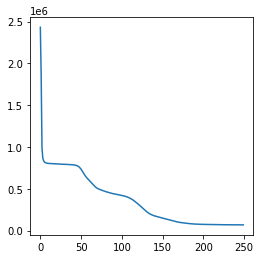

In [36]:
loss_df=pd.DataFrame(model.history.history)
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(loss_df)


(0.0, 100000.0)

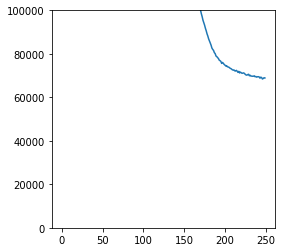

In [37]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(loss_df)
ax.set_ylim(0,100000)

(0.0, 1000000.0)

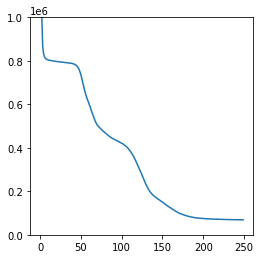

In [39]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(loss_df)
ax.set_ylim(0,1000000)

In [40]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
y_pred = model.predict(X_test)
my_dict={"Actual":y_test.reshape(5225 ,), "Pred":y_pred.reshape(5225 ,)}
print(eval_metrics(y_test, y_pred))
compare=pd.DataFrame(my_dict)
compare

r2_score: 0.9386399131196392 
 mae: 164.079147571947 
 mse: 73092.90420706254 
 rmse: 270.35699400433964
None


,Actual,Pred
0,66,5.541649
1,1749,1993.116821
2,172,178.217438
3,2866,2535.230469
4,1550,1401.118286
...,...,...
5220,3002,3771.504639
5221,1613,1259.488037
5222,1186,934.832764
5223,1133,745.946594


In [41]:
my_dict

{'Actual': array([  66, 1749,  172, ..., 1186, 1133,  163]),
 'Pred': array([   5.541649, 1993.1168  ,  178.21744 , ...,  934.83276 ,
         745.9466  ,  107.78797 ], dtype=float32)}

---
---

## 3. Model Building with LSTM



##Recurrent Neural Networks 
RNN are a type of artifcial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, numerical times series data.

Recurrent Neural Networks use backpropagation algorithm for training. Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNNs could be stacked up to deeper versions, which contain more than 1 layers of RNN. Because RNNs are especially computationally expensive to train, normally a deep RNN model contains no more than 3 layers of LSTM.

Train a bidirectional long short term memory (LSTM) recurrent neural network (RNN) with this data, making use of the self-loop and forget gate of LSTM.

LSTM sequential learning model was chosen because of its ability to process sequential data and memorize data of past time steps.

LSTM is a different type of gated RNN which is capable of learning long-term dependencies LSTM is not affected by vanishing gradient or exploding gradient problem
Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.

#### Bidirectional LSTM :
Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem. Figure shows the mechanism of Bidirectional LSTM.






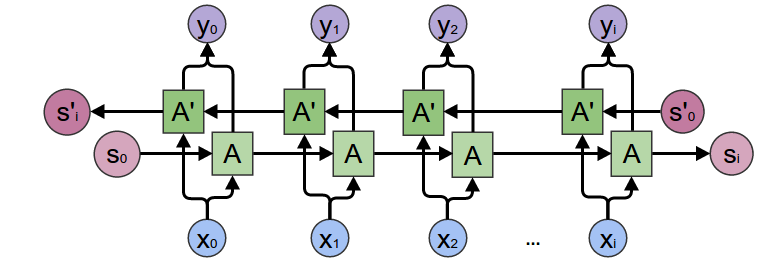

### Create, Compile and Fit Bidirectional LSTM Model

- Create a Sequential Model,
- Add Bidirectional layers,
- Apply Regularization (Drop Out),
- Compile the model.

***Note:*** *Define the optimizer as the efficient stochastic gradient descent algorithm ***adam***.* *This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.*

*In this case, use ***mean squared error*** as the loss argument. This loss is for a regression problems and is defined in Keras as mean_squared_error.
Also use defined in Keras as ***accuracy*** as the metrics.*

### Plot Train and Validation Losses

---
---

## 4. Demand Predictions

At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values. 

For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.

### Inverse Transform

### Plot Prediction

### Calculate Train and Test Error Scores

Epoch 1/400
191/191 [==============================] - 1s 3ms/step - loss: 2490195.9570 - mae: 1150.3282 - val_loss: 2453376.2500 - val_mae: 1126.2499
Epoch 2/400
191/191 [==============================] - 0s 2ms/step - loss: 2316566.5898 - mae: 1090.7564 - val_loss: 2132630.5000 - val_mae: 1008.9896
Epoch 3/400
191/191 [==============================] - 0s 2ms/step - loss: 1915391.5671 - mae: 941.7978 - val_loss: 1402668.5000 - val_mae: 765.8652
Epoch 4/400
191/191 [==============================] - 1s 3ms/step - loss: 1331481.3783 - mae: 767.7368 - val_loss: 1017101.2500 - val_mae: 657.8118
Epoch 5/400
191/191 [==============================] - 1s 3ms/step - loss: 1175827.3057 - mae: 745.1322 - val_loss: 974008.6250 - val_mae: 640.4669
Epoch 6/400
191/191 [==============================] - 1s 3ms/step - loss: 1146001.2637 - mae: 735.5893 - val_loss: 927564.3125 - val_mae: 632.6458
Epoch 7/400
191/191 [==============================] - 0s 2ms/step - loss: 1101281.5462 - mae: 723.6069 

191/191 [==============================] - 0s 2ms/step - loss: 1015182.0977 - mae: 698.8726 - val_loss: 870642.1250 - val_mae: 626.5203
Epoch 57/400
191/191 [==============================] - 0s 2ms/step - loss: 1042677.1104 - mae: 703.7073 - val_loss: 874749.5000 - val_mae: 626.2150
Epoch 58/400
191/191 [==============================] - 0s 2ms/step - loss: 1022816.8799 - mae: 701.4273 - val_loss: 869107.3125 - val_mae: 626.9487
Epoch 59/400
191/191 [==============================] - 1s 4ms/step - loss: 993468.9333 - mae: 693.1284 - val_loss: 862195.2500 - val_mae: 627.3274
Epoch 60/400
191/191 [==============================] - 1s 3ms/step - loss: 992595.1419 - mae: 692.9238 - val_loss: 869411.9375 - val_mae: 625.3914
Epoch 61/400
191/191 [==============================] - 1s 6ms/step - loss: 1037119.6891 - mae: 703.3388 - val_loss: 876731.7500 - val_mae: 623.7910
Epoch 62/400
191/191 [==============================] - 1s 3ms/step - loss: 981366.1029 - mae: 691.5612 - val_loss: 87577

191/191 [==============================] - 0s 2ms/step - loss: 998981.4964 - mae: 691.7072 - val_loss: 862331.7500 - val_mae: 622.8806
Epoch 112/400
191/191 [==============================] - 0s 2ms/step - loss: 1015455.0146 - mae: 696.7503 - val_loss: 855651.2500 - val_mae: 625.3326
Epoch 113/400
191/191 [==============================] - 0s 2ms/step - loss: 1027061.1162 - mae: 707.6807 - val_loss: 864071.5625 - val_mae: 623.1516
Epoch 114/400
191/191 [==============================] - 0s 2ms/step - loss: 1021964.3161 - mae: 701.7117 - val_loss: 855887.4375 - val_mae: 623.9237
Epoch 115/400
191/191 [==============================] - 0s 2ms/step - loss: 1035097.1973 - mae: 701.9147 - val_loss: 853774.1875 - val_mae: 623.0419
Epoch 116/400
191/191 [==============================] - 0s 2ms/step - loss: 987214.9837 - mae: 688.1013 - val_loss: 858305.2500 - val_mae: 623.0583
Epoch 117/400
191/191 [==============================] - 0s 2ms/step - loss: 999026.5745 - mae: 693.0255 - val_loss:

<AxesSubplot:>

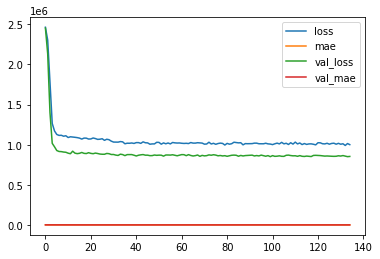

In [42]:
X = df_model_dummy.drop("cnt", axis=1).values
y = df_model_dummy[["cnt"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop

model = Sequential()
model.add(Dense(30,activation='relu')) #Input Layer and HIdden Layer 1
model.add(Dropout(0.3)) # yuzde 30 kullanmicak
model.add(Dense(15,activation='relu')) #HIdden Layer 2
model.add(Dropout(0.3)) # yuzde 30 kullanmicak
model.add(Dense(5,activation='relu')) #HIdden Layer 3
model.add(Dropout(0.3)) # yuzde 30 kullanmicak
model.add(Dense(1)) #Outpur Layer

#opt=Adam(lr=0.001)
opt=RMSprop(lr=0.001)
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience = 35)

model.compile(loss='mse', optimizer=opt, metrics=['mae'])
model.fit(X_train, y_train, batch_size=64, epochs = 400, validation_data = (X_test, y_test), verbose =1, callbacks=early_stop)
print(model.summary())
losses = pd.DataFrame(model.history.history)
losses.plot()


#model.compile(optimizer='rmsprop', loss='mse')
#model.fit(X_train, y_train, batch_size=32, epochs=250) 
#print(model.summary())

(0.0, 1000.0)

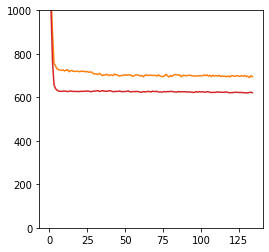

In [43]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(losses)
ax.set_ylim(0,1000)


In [44]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
y_pred = model.predict(X_test)
my_dict={"Actual":y_test.reshape(5225 ,), "Pred":y_pred.reshape(5225 ,)}
print(eval_metrics(y_test, y_pred))
compare=pd.DataFrame(my_dict)
compare

r2_score: 0.28317897290601823 
 mae: 621.3538046863318 
 mse: 853886.1877615469 
 rmse: 924.0596234884126
None


,Actual,Pred
0,66,636.489990
1,1749,528.366882
2,172,709.060059
3,2866,1663.759277
4,1550,845.548645
...,...,...
5220,3002,840.451111
5221,1613,708.822815
5222,1186,1155.717041
5223,1133,586.065002


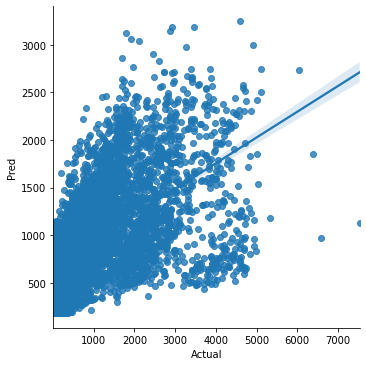

In [68]:
sns.lmplot(x='Actual', y='Pred',data=compare)

# Alternative Solution

In [203]:
df = df2.copy()

In [204]:
df['day_of_week'] = df.index.dayofweek
df=df.drop('year',axis=1)
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour,day_of_week
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.00,2.00,93.00,6.00,3.00,0.00,1.00,3.00,1,4,0,6
2015-01-04 01:00:00,138,3.00,2.50,93.00,5.00,1.00,0.00,1.00,3.00,1,4,1,6
2015-01-04 02:00:00,134,2.50,2.50,96.50,0.00,1.00,0.00,1.00,3.00,1,4,2,6
2015-01-04 03:00:00,72,2.00,2.00,100.00,0.00,1.00,0.00,1.00,3.00,1,4,3,6
2015-01-04 04:00:00,47,2.00,0.00,93.00,6.50,1.00,0.00,1.00,3.00,1,4,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.00,1.00,81.00,19.00,3.00,0.00,0.00,3.00,1,3,19,1
2017-01-03 20:00:00,541,5.00,1.00,81.00,21.00,4.00,0.00,0.00,3.00,1,3,20,1
2017-01-03 21:00:00,337,5.50,1.50,78.50,24.00,4.00,0.00,0.00,3.00,1,3,21,1


In [205]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[:train_size], df.iloc[train_size:]
print(len(train), len(test))

15672 1742


In [207]:
from sklearn.preprocessing import RobustScaler
f_columns = ['t1','t2', 'hum', 'wind_speed']
f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']])

train.loc[:,f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

test.loc[:,f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])

/Users/me/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-207-d38bd28ea846>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cnt'] = cnt_transformer.transform(train[['cnt']])
/Users/me/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [208]:
train

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour,day_of_week
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,-0.46,-1.25,-1.05,0.97,-0.82,3.00,0.00,1.00,3.00,1,4,0,6
2015-01-04 01:00:00,-0.50,-1.25,-1.00,0.97,-0.91,1.00,0.00,1.00,3.00,1,4,1,6
2015-01-04 02:00:00,-0.50,-1.31,-1.00,1.15,-1.36,1.00,0.00,1.00,3.00,1,4,2,6
2015-01-04 03:00:00,-0.54,-1.38,-1.05,1.32,-1.36,1.00,0.00,1.00,3.00,1,4,3,6
2015-01-04 04:00:00,-0.56,-1.38,-1.24,0.97,-0.77,1.00,0.00,1.00,3.00,1,4,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-23 03:00:00,-0.44,-0.62,-0.57,0.82,-0.82,2.00,0.00,1.00,2.00,10,23,3,6
2016-10-23 04:00:00,-0.49,-0.62,-0.57,0.97,-0.82,2.00,0.00,1.00,2.00,10,23,4,6
2016-10-23 05:00:00,-0.52,-0.62,-0.48,0.68,-1.00,3.00,0.00,1.00,2.00,10,23,5,6


In [209]:
def create_dataset(X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [210]:
time_steps = 10
X_train, y_train = create_dataset(train, train.cnt,time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)
print(X_train.shape, y_train.shape)

(15662, 10, 13) (15662,)


In [211]:
from tensorflow import keras
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units=128,
            input_shape=(X_train.shape[1],X_train.shape[2])
)))
model.add(keras.layers.Dropout(rate=0.2)) # to prevent overfitting
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.1,
                   shuffle=False)

Epoch 1/10
441/441 [==============================] - 18s 26ms/step - loss: 0.3875 - accuracy: 9.9876e-04 - val_loss: 0.1228 - val_accuracy: 6.3816e-04
Epoch 2/10
441/441 [==============================] - 11s 24ms/step - loss: 0.0906 - accuracy: 0.0012 - val_loss: 0.0691 - val_accuracy: 6.3816e-04
Epoch 3/10
441/441 [==============================] - 11s 26ms/step - loss: 0.0551 - accuracy: 0.0012 - val_loss: 0.0443 - val_accuracy: 6.3816e-04
Epoch 4/10
441/441 [==============================] - 12s 27ms/step - loss: 0.0430 - accuracy: 0.0012 - val_loss: 0.0400 - val_accuracy: 6.3816e-04
Epoch 5/10
441/441 [==============================] - 12s 28ms/step - loss: 0.0380 - accuracy: 0.0012 - val_loss: 0.0355 - val_accuracy: 6.3816e-04
Epoch 6/10
441/441 [==============================] - 16s 36ms/step - loss: 0.0285 - accuracy: 0.0012 - val_loss: 0.0348 - val_accuracy: 6.3816e-04
Epoch 7/10
441/441 [==============================] - 15s 33ms/step - loss: 0.0251 - accuracy: 0.0012 - val_

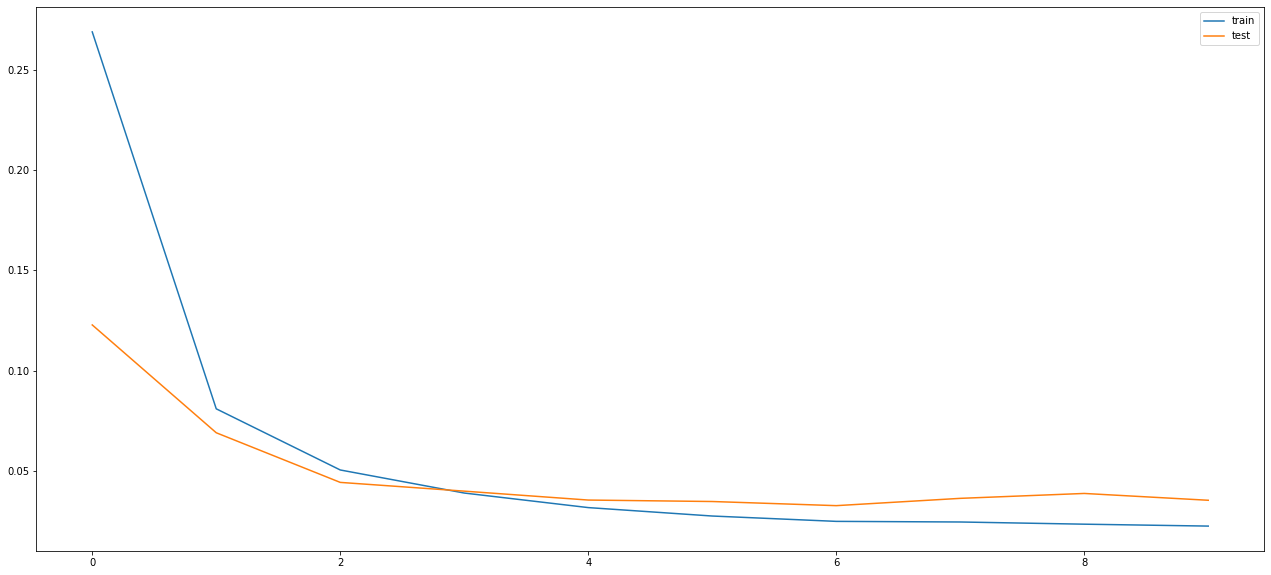

In [212]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()

In [213]:
y_pred = model.predict(X_test)
y_pred

array([[ 0.47895575],
       [ 0.17659524],
       [-0.10868444],
       ...,
       [-0.0512215 ],
       [-0.17484841],
       [-0.27286345]], dtype=float32)

In [214]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1,-1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)
print(y_train_inv)
print(y_test_inv)
print(y_pred_inv)

[[528. 727. 862. ... 107. 107. 173.]]
[[1376.  894.  615. ...  337.  224.  139.]]
[[1552.4437 ]
 [1113.4163 ]
 [ 699.1902 ]
 ...
 [ 782.62634]
 [ 603.1201 ]
 [ 460.80228]]


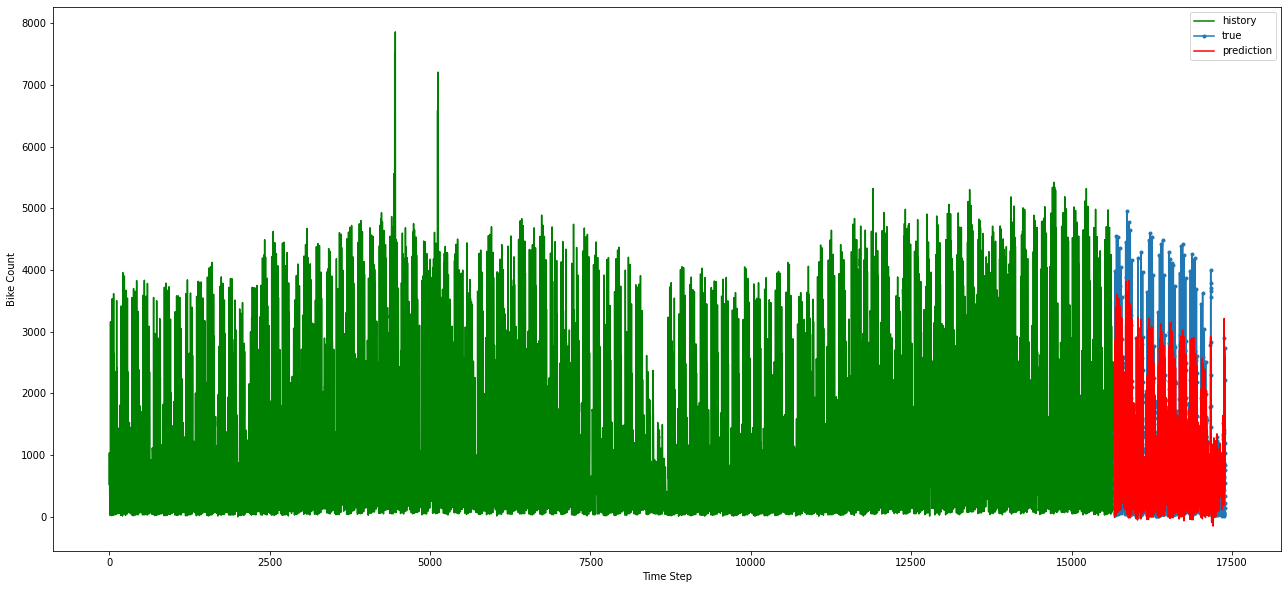

In [215]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label='history')
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_test_inv.flatten(),marker='.', label='true')
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_pred_inv.flatten(), 'r', label='prediction')
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

(15648, 24, 13) (15648,)
Epoch 1/10
441/441 [==============================] - 113s 229ms/step - loss: 0.4797 - accuracy: 9.5303e-04 - val_loss: 0.1881 - val_accuracy: 6.3898e-04
Epoch 2/10
441/441 [==============================] - 109s 246ms/step - loss: 0.0935 - accuracy: 0.0012 - val_loss: 0.0689 - val_accuracy: 6.3898e-04
Epoch 3/10
441/441 [==============================] - 99s 224ms/step - loss: 0.0577 - accuracy: 0.0012 - val_loss: 0.0396 - val_accuracy: 6.3898e-04
Epoch 4/10
441/441 [==============================] - 98s 222ms/step - loss: 0.0454 - accuracy: 0.0012 - val_loss: 0.0350 - val_accuracy: 6.3898e-04
Epoch 5/10
441/441 [==============================] - 96s 218ms/step - loss: 0.0355 - accuracy: 0.0012 - val_loss: 0.0279 - val_accuracy: 6.3898e-04
Epoch 6/10
441/441 [==============================] - 97s 220ms/step - loss: 0.0293 - accuracy: 0.0012 - val_loss: 0.0355 - val_accuracy: 6.3898e-04
Epoch 7/10
441/441 [==============================] - 101s 228ms/step - los

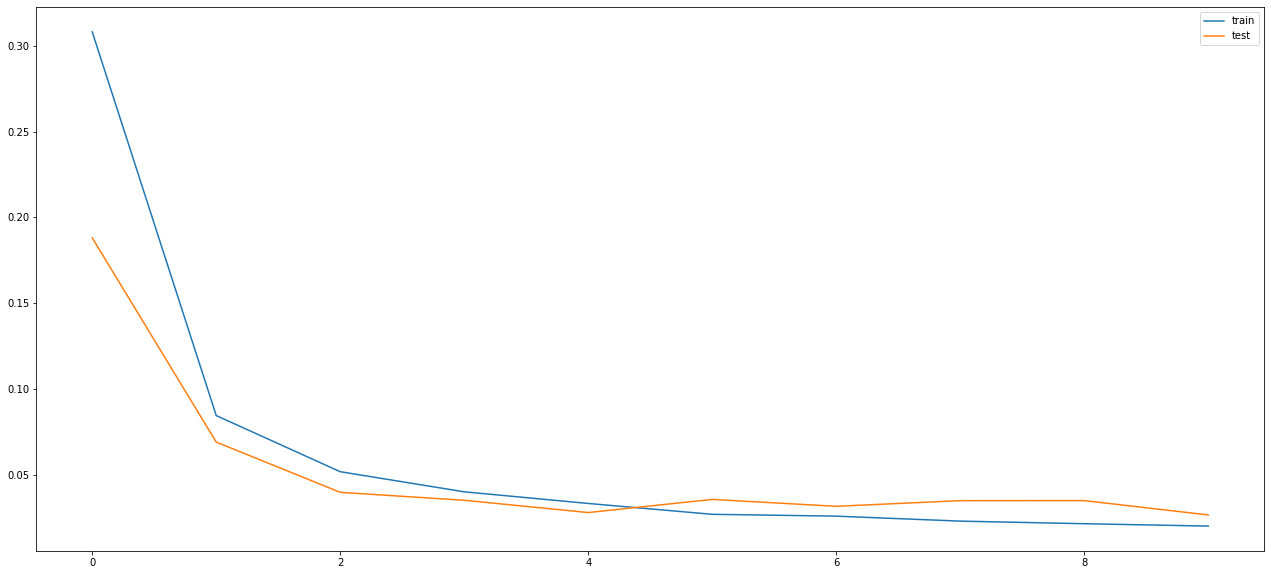

y_pred [[ 1.8650774 ]
 [ 0.9635429 ]
 [ 0.27035028]
 ...
 [-0.19749942]
 [-0.29512414]
 [-0.36212087]]
[[ 83.  67.  32. ... 107. 107. 173.]]
[[3985. 2070.  968. ...  337.  224.  139.]]
[[3565.0923 ]
 [2256.0642 ]
 [1249.5486 ]
 ...
 [ 570.23083]
 [ 428.47974]
 [ 331.2005 ]]


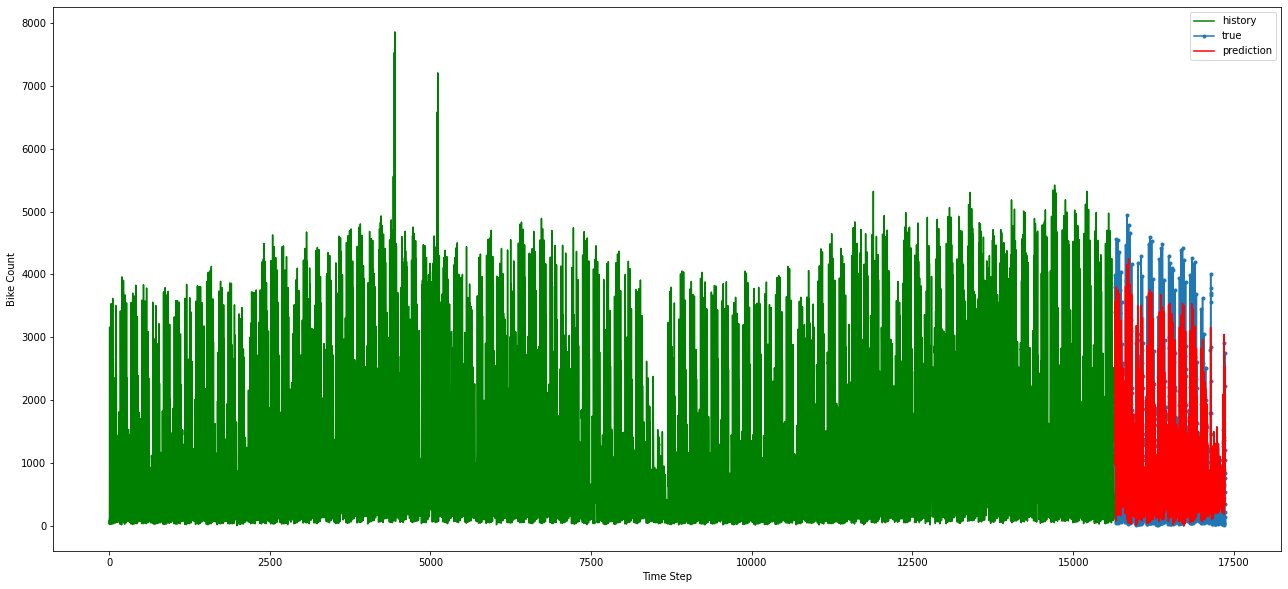

In [216]:
## with 24 steps
time_steps = 24
X_train, y_train = create_dataset(train, train.cnt,time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)
print(X_train.shape, y_train.shape)

from tensorflow import keras
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units=312,
            input_shape=(X_train.shape[1],X_train.shape[2])
)))
model.add(keras.layers.Dropout(rate=0.2)) # to prevent overfitting
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.1,
                   shuffle=False)

plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

y_pred = model.predict(X_test)
print('y_pred', y_pred)

y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1,-1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)
print(y_train_inv)
print(y_test_inv)
print(y_pred_inv)

plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label='history')
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_test_inv.flatten(),marker='.', label='true')
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_pred_inv.flatten(), 'r', label='prediction')
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();


In [223]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
y_pred = model.predict(X_test)
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(-1,1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)
my_dict={"Actual":y_test_inv.reshape(1718 ,), "Pred":y_pred_inv.reshape(1718 ,)}
print(eval_metrics(y_test_inv, y_pred_inv))
compare=pd.DataFrame(my_dict)
compare

r2_score: 0.9295403636475236 
 mae: 151.95174076670958 
 mse: 60944.57978199276 
 rmse: 246.8695602580293
None


,Actual,Pred
0,"3,985.00","3,565.09"
1,"2,070.00","2,256.06"
2,968.00,"1,249.55"
3,965.00,956.67
4,"1,180.00","1,255.21"
...,...,...
1713,"1,042.00","1,385.81"
1714,541.00,783.52
1715,337.00,570.23
1716,224.00,428.48
